(ch_tables)=
# Table manipulation

Pandas, short for Python Data Analysis Library, is a modern, powerful and feature rich library that is designed for doing data analysis in Python. Here, we will cover some basic Pandas that will allow you to store results in table format, do some basic table operations, visualization, and to read and write tables to files. You will find more information online in the [Pandas Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) and in chapter 3 of the Python Data Science Handbook {cite:p}`vanderplas16`.

In [1]:
import pandas as pd
pd.__version__

'2.1.1'

## DataFrame

The main pandas data structure is a table format called **DataFrame**. A DataFrame contains an **Index** and it contains columns. Columns are one-dimensional arrays of a single type called **Series**. A DataFrame can be created from a:
+ single Series object
+ list of dicts
+ dictionary of Series objects
+ two-dimensional NumPy array
+ NumPy structured array

In [2]:
mySeries = pd.Series(['London', 'Paris', 'Berlin'], name='City', dtype='string')
cities = pd.DataFrame({"City": mySeries, "Population": [8.8, 2.2, 3.6]})
cities

City  Population
0  London         8.8
1   Paris         2.2
2  Berlin         3.6

DataFrames have the following attributes: `dtypes`, `shape`, `index`, `columns`, `values`, `empty`.

In [3]:
cities.columns

Index(['City', 'Population'], dtype='object')

In [4]:
cities.dtypes

City          string[python]
Population           float64
dtype: object

In [5]:
cities.shape

(3, 2)

In [6]:
cities.values

array([['London', 8.8],
       ['Paris', 2.2],
       ['Berlin', 3.6]], dtype=object)

## Reading and writing

The pandas library can read a variety of data formats using `pandas.read_*()`, including CSV, JSON, HTML, HDF5, Excel, SQL, SPSS, SAS, etc.:

In [ ]:
fname = '../data/airquality.csv'
airq = pd.read_csv(fname, index_col=0)
airq.head()

Ozone  Solar  Wind  Temp  Month  Day
ID                                       
101   41.0  190.0   7.4    67      5    1
102   36.0  118.0   8.0    72      5    2
103   12.0  149.0  12.6    74      5    3
104   18.0  313.0  11.5    62      5    4
105    NaN    NaN  14.3    56      5    5

The DataFrame object contains `to_*()` methods to write it to a file or database, e.g. `airq.to_csv(out_filename)`.

## Inspect DataFrame

DataFrames have several methods that are useful for inspection: `head()`, `tail()`, and `describe()`

In [8]:
airq.describe()

Ozone       Solar        Wind        Temp       Month         Day
count  116.000000  146.000000  153.000000  153.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353    6.993464   15.803922
std     32.987885   90.058422    3.523001    9.465270    1.416522    8.864520
min      1.000000    7.000000    1.700000   56.000000    5.000000    1.000000
25%     18.000000  115.750000    7.400000   72.000000    6.000000    8.000000
50%     31.500000  205.000000    9.700000   79.000000    7.000000   16.000000
75%     63.250000  258.750000   11.500000   85.000000    8.000000   23.000000
max    168.000000  334.000000   20.700000   97.000000    9.000000   31.000000

## Access values

### Select columns

In [9]:
airq.Ozone

ID
101    41.0
102    36.0
103    12.0
104    18.0
105     NaN
       ... 
249    30.0
250     NaN
251    14.0
252    18.0
253    20.0
Name: Ozone, Length: 153, dtype: float64

..or using a name or a `list` of names.

In [10]:
airq["Ozone"].head()

ID
101    41.0
102    36.0
103    12.0
104    18.0
105     NaN
Name: Ozone, dtype: float64

In [11]:
airq[["Ozone", "Solar"]].head()

Ozone  Solar
ID               
101   41.0  190.0
102   36.0  118.0
103   12.0  149.0
104   18.0  313.0
105    NaN    NaN

### Select rows

We can extract rows (called slicing) from a date frame using indexing similar to indexing lists and tuples, where the first index is being inclusive and the last exclusive.

In [12]:
airq[2:4]

Ozone  Solar  Wind  Temp  Month  Day
ID                                       
103   12.0  149.0  12.6    74      5    3
104   18.0  313.0  11.5    62      5    4

### Rows and columns

To extract rows and columns, we need to chain the commands pulling the columns and then the rows or vice versa (order does not matter).

In [13]:
airq[["Ozone", "Solar"]][2:4]

Ozone  Solar
ID               
103   12.0  149.0
104   18.0  313.0

### Indexing

+ The `loc` attribute allows indexing and slicing that always references the explicit index
+ The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index
+ The `ix` attribute was a hybrid of the two. It is now depreciated.

Using the `iloc` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result:

In [14]:
airq.iloc[1:3, 2:4]

Wind  Temp
ID             
102   8.0    72
103  12.6    74

Similarly, using the `loc` indexer we can index the underlying data in an array-like style but using the explicit row index and column indices:

In [15]:
airq.loc[100:102, ["Wind", "Temp"]]

Wind  Temp
ID             
101   7.4    67
102   8.0    72

### Masking

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice. First, while indexing refers to columns, slicing refers to rows. We've already used numerical ranges for slices. Also, boolean masking operations work for selecting rows.

In [16]:
airq[(airq.Ozone > 15) & (airq.Ozone < 18)]

Ozone  Solar  Wind  Temp  Month  Day
ID                                       
112   16.0  256.0   9.7    69      5   12
182   16.0    7.0   6.9    74      7   21
195   16.0   77.0   7.4    82      8    3
243   16.0  201.0   8.0    82      9   20

### Asign new column

In [17]:
import numpy as np
airq["logOzone"]  = np.log(airq.Ozone)
airq.head()

Ozone  Solar  Wind  Temp  Month  Day  logOzone
ID                                                 
101   41.0  190.0   7.4    67      5    1  3.713572
102   36.0  118.0   8.0    72      5    2  3.583519
103   12.0  149.0  12.6    74      5    3  2.484907
104   18.0  313.0  11.5    62      5    4  2.890372
105    NaN    NaN  14.3    56      5    5       NaN

## Methods

You can do masking and other useful things directly via methods of *Series* and *DataFrames*., e.g.

+ airq.Ozone.between(15, 18)
+ airq.Month.isin([5, 8])
+ airq.Month.astype("string")

In [18]:
airq.isna().sum()

Ozone       37
Solar        7
Wind         0
Temp         0
Month        0
Day          0
logOzone    37
dtype: int64

Simple aggregation functions include `mean()`, `median()`, `min()`, `max()`, and `std()`.

In [19]:
airq['Ozone'].mean()

42.12931034482759

## Grouping

Sometimes we want to apply aggregation functions for individual factors separately.

In [20]:
airq.groupby('Month')

Sometimes we want to apply aggregation functions for individual factors separately.

In [21]:
airq.groupby('Month').mean()

Ozone       Solar       Wind       Temp   Day  logOzone
Month                                                             
5      23.615385  181.296296  11.622581  65.548387  16.0  2.812076
6      29.444444  190.166667  10.266667  79.100000  15.5  3.236673
7      59.115385  216.483871   8.941935  83.903226  16.0  3.883834
8      59.961538  171.857143   8.793548  83.967742  16.0  3.845345
9      31.448276  167.433333  10.180000  76.900000  15.5  3.218795

Groupby comes with additional aggregation methods that provide more flexibility: `aggregate()`, `filter()`, `transform()`, and `apply()`.


In [22]:
airq.groupby('Month').aggregate(["min", "max", "mean"])

Ozone                   Solar                    Wind                   \
        min    max       mean   min    max        mean  min   max       mean   
Month                                                                          
5       1.0  115.0  23.615385   8.0  334.0  181.296296  5.7  20.1  11.622581   
6      12.0   71.0  29.444444  31.0  332.0  190.166667  1.7  20.7  10.266667   
7       7.0  135.0  59.115385   7.0  314.0  216.483871  4.1  14.9   8.941935   
8       9.0  168.0  59.961538  24.0  273.0  171.857143  2.3  15.5   8.793548   
9       7.0   96.0  31.448276  14.0  259.0  167.433333  2.8  16.6  10.180000   

      Temp                Day            logOzone                      
       min max       mean min max  mean       min       max      mean  
Month                                                                  
5       56  81  65.548387   1  31  16.0  0.000000  4.744932  2.812076  
6       65  93  79.100000   1  30  15.5  2.484907  4.262680  3.236673  
7       73  92  83.903226   1  31  16.0  1.945910  4.905275  3.883834  
8       72  97  83.967742   1  31  16.0  2.197225  5.123964  3.845345  
9       63  93  76.900000   1  30  15.5  1.945910  4.564348  3.218795

## Append
### Append rows

The stack two data.frames together by row, use the `concat()` function. Note `append()` will be depreciated in future versions of pandas.

In [23]:
pd.concat([airq.head(2), airq.tail(2)])

Ozone  Solar  Wind  Temp  Month  Day  logOzone
ID                                                 
101   41.0  190.0   7.4    67      5    1  3.713572
102   36.0  118.0   8.0    72      5    2  3.583519
252   18.0  131.0   8.0    76      9   29  2.890372
253   20.0  223.0  11.5    68      9   30  2.995732

### Append columns

The `concat()` function can also be used to stack columns of DataFrames together. The row index is preserved with an outer join by default.

In [24]:
pd.concat([airq.head(2), airq.tail(2)], axis=1)

Ozone  Solar  Wind  Temp  Month  Day  logOzone  Ozone  Solar  Wind  Temp  \
ID                                                                              
101   41.0  190.0   7.4  67.0    5.0  1.0  3.713572    NaN    NaN   NaN   NaN   
102   36.0  118.0   8.0  72.0    5.0  2.0  3.583519    NaN    NaN   NaN   NaN   
252    NaN    NaN   NaN   NaN    NaN  NaN       NaN   18.0  131.0   8.0  76.0   
253    NaN    NaN   NaN   NaN    NaN  NaN       NaN   20.0  223.0  11.5  68.0   

     Month   Day  logOzone  
ID                          
101    NaN   NaN       NaN  
102    NaN   NaN       NaN  
252    9.0  29.0  2.890372  
253    9.0  30.0  2.995732

To ignore row indices when stacking columns, you need to clear them prior to calling `pd.concat()`.

In [25]:
df1 = airq.head(2).copy().reset_index(drop=True)
df2 = airq.tail(2).copy().reset_index(drop=True)
pd.concat([df1, df2], axis=1)

Ozone  Solar  Wind  Temp  Month  Day  logOzone  Ozone  Solar  Wind  Temp  \
0   41.0  190.0   7.4    67      5    1  3.713572   18.0  131.0   8.0    76   
1   36.0  118.0   8.0    72      5    2  3.583519   20.0  223.0  11.5    68   

   Month  Day  logOzone  
0      9   29  2.890372  
1      9   30  2.995732

## Merge

Pandas implements several ways of combining datasets via the `pd.merge()` function and the `join()`methods of *Series* and *DataFrames*.

The `pd.merge()` function implements one-to-one, many-to-one, and many-to-many joins.

The `pd.merge()` function joins based on column names and not the Index. The column names can be explicitly defined via the keywords `on`, `left_on`, and `right_on`.

## Copy

In [26]:
# Shallow copy
shallow_copy = airq

# Deep copy
deep_copy = airq.copy()

## Visualization
### matplotlib

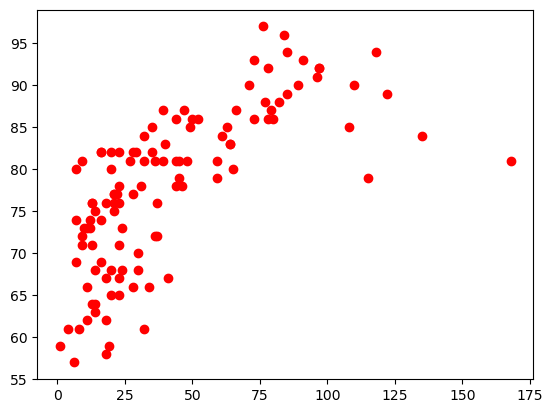

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(airq.Ozone, airq.Temp, 'or')
plt.show()

### Pandas

Pandas provides visualization tools built on top of matplotlib. Hence, you still need to import matplotlib's pyplot. You can read more in the pandas reference guide [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). There are two ways to use pandas for plotting:

+ via [`plot()` methods](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for Series and DataFrames.
+ via the plotting module [`pandas.plotting`](https://pandas.pydata.org/docs/reference/plotting.html). 

By default `plot()` shows a line graph using the row indices a x-axis and the columns as data lines:

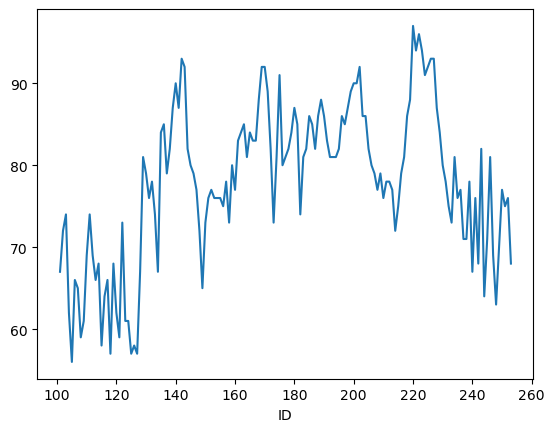

In [28]:
airq.Temp.plot()
plt.show()


You can create other plots using the methods DataFrame.plot.`kind` or provide the kind keyword argument to the [`plot()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html):

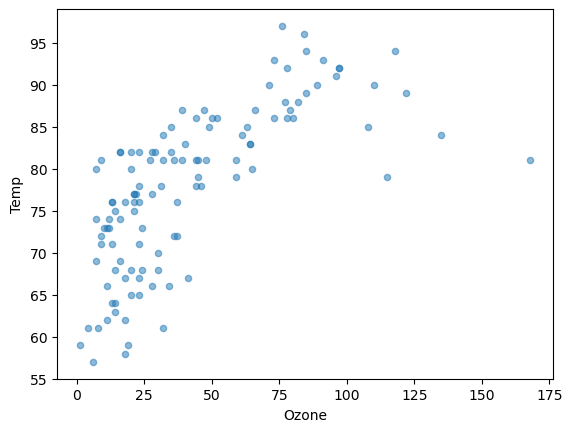

In [29]:
airq.plot.scatter(x="Ozone", y="Temp", alpha=0.5)
plt.show()